- EDA
- feature selection
- up sampling

achieved the best test cls score: 98.3% with gradient boosting

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [72]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}': {unique_values}")

customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender': ['Female' 'Male']
SeniorCitizen': [0 1]
Partner': ['Yes' 'No']
Dependents': ['No' 'Yes']
tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService': ['No' 'Yes']
MultipleLines': ['No phone service' 'No' 'Yes']
InternetService': ['DSL' 'Fiber optic' 'No']
OnlineSecurity': ['No' 'Yes' 'No internet service']
OnlineBackup': ['Yes' 'No' 'No internet service']
DeviceProtection': ['No' 'Yes' 'No internet service']
TechSupport': ['No' 'Yes' 'No internet service']
StreamingTV': ['No' 'Yes' 'No internet service']
StreamingMovies': ['No' 'Yes' 'No internet service']
Contract': ['Month-to-month' 'One year' 'Two year']
PaperlessBilling': ['Yes' 'No']
PaymentMethod': ['Electronic check' 'Mailed check' 'Bank tr

Text(0, 0.5, 'Churn')

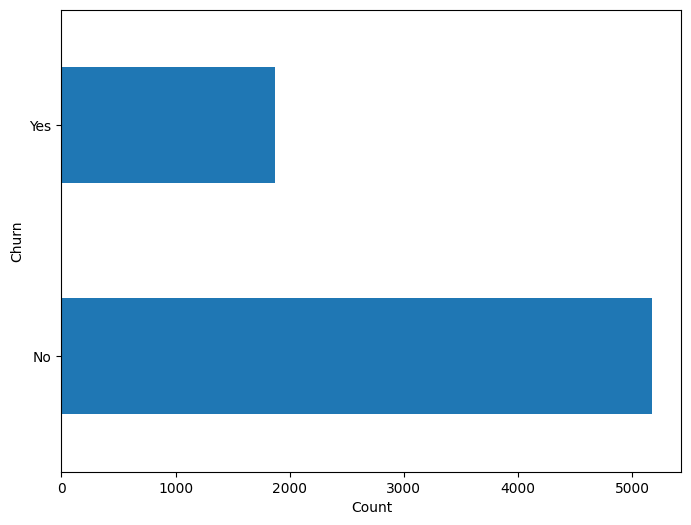

In [75]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count')
plt.ylabel('Churn')
# in-balanced data

In [76]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

In [77]:
data['TotalCharges'].isna().sum()

11

In [78]:
# Replace non-numeric values with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [79]:
mean_value = data['TotalCharges'].mean()
mean_value

2283.3004408418656

In [80]:
data['TotalCharges'] = data['TotalCharges'].fillna(mean_value)

In [81]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [82]:
data = data.drop(['customerID'], axis=1)

In [83]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [84]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded_cols = pd.DataFrame(one_hot_encoder.fit_transform(data[non_numeric_cols]),
                                    columns=one_hot_encoder.get_feature_names_out(non_numeric_cols))
data = pd.concat([data, one_hot_encoded_cols], axis=1)
data = data.drop(non_numeric_cols, axis=1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [85]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

<Axes: >

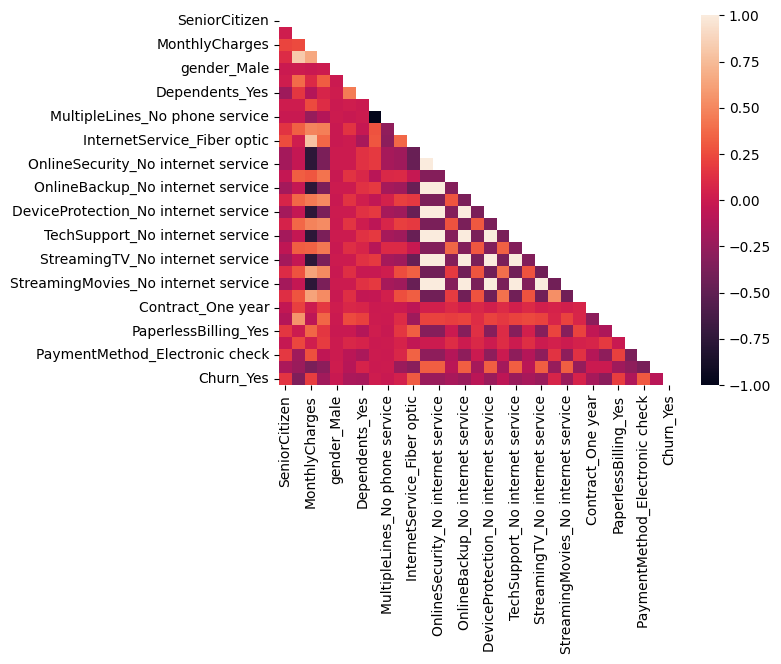

In [86]:
corr = data.corr()
sns.heatmap((corr), mask=np.triu(corr))

In [87]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:30]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)
clf.fit(X_train, y_train)

tr_pred = clf.predict(X_train)
acc_tr = accuracy_score(tr_pred, y_train)

pred = clf.predict(X_test)
acc_te = accuracy_score(pred, y_test)

print(acc_tr, acc_te)

0.8120340788072418 0.8225691980127751


In [90]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.3,
                                 max_depth=5,
                                 random_state=0)
clf.fit(X_train, y_train)

tr_pred = clf.predict(X_train)
acc_tr = accuracy_score(tr_pred, y_train)

pred = clf.predict(X_test)
acc_te = accuracy_score(pred, y_test)

print(acc_tr, acc_te)
# overfitting

0.9985800496982605 0.7785663591199432


In [91]:
clf.feature_importances_

array([1.48801963e-02, 1.90855488e-01, 1.93300318e-01, 2.40795292e-01,
       1.20213228e-02, 1.03194637e-02, 1.42135848e-02, 2.78706561e-03,
       3.50589587e-03, 1.18235397e-02, 1.01974124e-01, 4.04159829e-03,
       2.09687187e-04, 1.50123625e-02, 1.61110199e-03, 1.03563868e-02,
       5.89364014e-04, 1.00560280e-02, 1.43659103e-03, 1.25716885e-02,
       3.58879621e-03, 6.88286184e-03, 1.43928197e-03, 1.26212265e-02,
       2.43057975e-02, 2.45471574e-02, 1.86847428e-02, 7.52915725e-03,
       3.96515761e-02, 8.38830305e-03])

In [27]:
# feature selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)

X = data.iloc[:, 0:30]
y = data.iloc[:, -1]
rf.fit(X, y)

importances = rf.feature_importances_

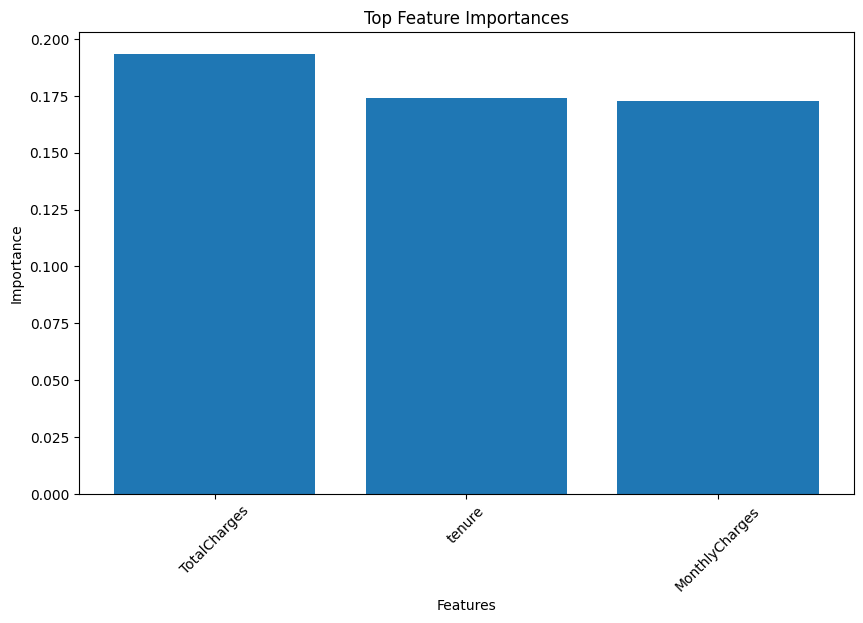

In [28]:
top_k = 3
indices = importances.argsort()[-top_k:][::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances[indices])
plt.title('Top Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [29]:
keep = list(feature_names)

In [30]:
all = list(data.columns)
drop = list(set(all) - set(keep))

In [31]:
small_data = data.drop(drop, axis=1)
small_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [32]:
X = small_data.iloc[:, 0:top_k]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [33]:
X_train.head(1)

,tenure,MonthlyCharges,TotalCharges
2142,21,64.85,1336.8


In [34]:
y_train.head(1)

2142    0.0
Name: Churn_Yes, dtype: float64

In [35]:
clf = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.3,
                                 max_depth=5,
                                 random_state=0)
clf.fit(X_train, y_train)

tr_pred = clf.predict(X_train)
acc_tr = accuracy_score(tr_pred, y_train)

pred = clf.predict(X_test)
acc_te = accuracy_score(pred, y_test)

print(acc_tr, acc_te)
# overfitting

0.9895278665246716 0.7700496806245565


In [ ]:
# feature selecton from 30 to 3/5 did not improve / degrade the accuracy

In [37]:
# up sampling
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

In [38]:
y.value_counts()

Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64

In [39]:
y_res.value_counts()

Churn_Yes
1.0    2835
0.0    2694
Name: count, dtype: int64

In [40]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res,test_size=0.2)

In [54]:
clf = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=1,
                                 max_depth=9,
                                 random_state=0)
clf.fit(Xr_train, yr_train)

tr_pred = clf.predict(Xr_train)
acc_tr = accuracy_score(tr_pred, yr_train)

pred = clf.predict(Xr_test)
acc_te = accuracy_score(pred, yr_test)

print(acc_tr, acc_te)
# overfitting

1.0 0.9792043399638336


In [51]:
# upsampling improved model test accuracy from 77 to 97%

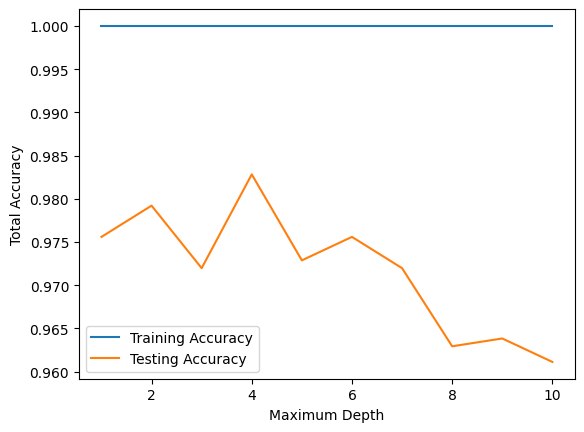

[0.9755877034358047, 0.9792043399638336, 0.9719710669077758, 0.9828209764918626, 0.972875226039783, 0.9755877034358047, 0.9719710669077758, 0.9629294755877035, 0.9638336347197106, 0.961121157323689]


In [58]:
max_depth_list = [7,9,11,12,13,14,15,16,17,18]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=1,
                                 max_depth=x,
                                 random_state=0)
    dtc.fit(Xr_train, yr_train)
    train_z = dtc.predict(Xr_train)
    test_z = dtc.predict(Xr_test)
    train_acc.append(accuracy_score(yr_train, train_z))
    test_acc.append(accuracy_score(yr_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_acc, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

print(test_acc)
# overfitting gone!!!

In [65]:
clf = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=1,
                                 max_depth=12,
                                 random_state=0)
clf.fit(Xr_train, yr_train)

tr_pred = clf.predict(Xr_train)
acc_tr = accuracy_score(tr_pred, yr_train)

pred = clf.predict(Xr_test)
acc_te = accuracy_score(pred, yr_test)

print(acc_tr, acc_te)

1.0 0.9828209764918626


In [62]:
from sklearn.metrics import classification_report
print(classification_report(yr_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       544
         1.0       0.98      0.99      0.98       562

    accuracy                           0.98      1106
   macro avg       0.98      0.98      0.98      1106
weighted avg       0.98      0.98      0.98      1106



In [70]:
clf.feature_importances_

array([0.4865922 , 0.28717658, 0.22623122])

In [ ]:
# achieved best test cls score: 98.3% with random forest